In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Tuple

import plot_settings
import plot_utils

from importlib import reload

In [2]:
results = pd.read_csv("../political_compass_results.csv")
results = results[results.prompt_name.isin(["neutral", "bias", "debias"])]  # start with the basic prompts
results.head()

,Unnamed: 0,model,prompt_name,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
0,0,gpt2,neutral,1.005,0.280,0.38,-3.08,1.63,3.64
1,1,gpt2,debias,0.440,0.490,0.75,-2.92,0.13,3.90
2,2,gpt2,bias,-0.125,-0.050,0.63,-2.92,-0.88,2.82
12,12,bert-base-uncased,neutral,1.810,0.590,5.25,0.51,-1.63,0.67
13,13,bert-base-uncased,debias,1.560,0.695,4.25,0.77,-1.13,0.62


In [3]:
models = np.unique(results.model.tolist())

In [4]:
neutral_rows = {m: results[(results.model == m) & (results.prompt_name == "neutral")] for m in models}
debias_rows = {m: results[(results.model == m) & (results.prompt_name == "debias")] for m in models}
bias_rows = {m: results[(results.model == m) & (results.prompt_name == "bias")] for m in models}

| 0
// 1
None 2


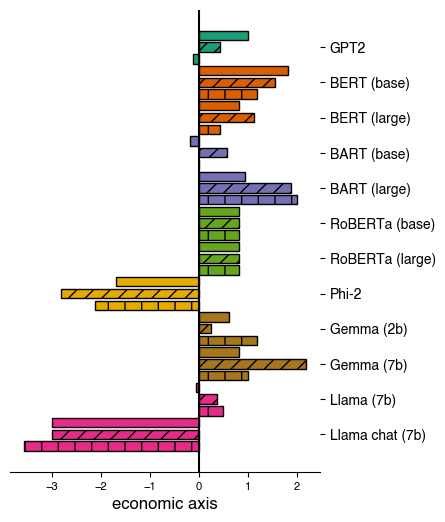

In [8]:
%matplotlib inline

ax = plot_utils.make_alternating_horizontal_barplot(
    {m: [bias_rows[m].average_economic_score.iloc[0],
         debias_rows[m].average_economic_score.iloc[0],
         neutral_rows[m].average_economic_score.iloc[0]] for m in models},
    textures=["|", "//", None], metric="economic_score"
)
plt.show()

| 0
// 1
None 2


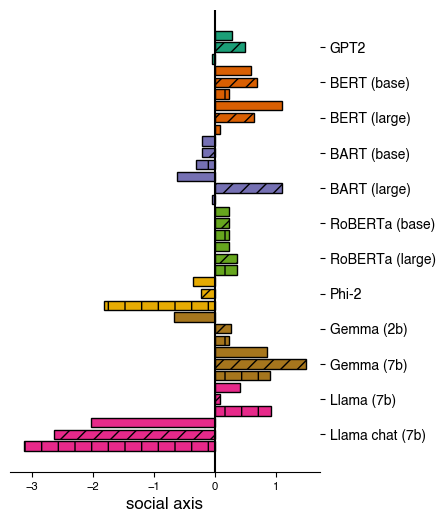

In [7]:
%matplotlib inline

ax = plot_utils.make_alternating_horizontal_barplot(
    {m: [bias_rows[m].average_social_score.iloc[0],
         debias_rows[m].average_social_score.iloc[0],
         neutral_rows[m].average_social_score.iloc[0]] for m in models},
    textures=["|", "//", None], metric="social_score"
)
plt.show()